This notebook involves analysis of reach of an instagram account.

In [1]:
# import dataset
import pandas as pd

df = pd.read_csv("Instagram.csv", encoding= "latin1")
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


check for missing values

In [2]:
df.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [3]:
# get index of each missing value
import numpy as np


for column in df:
    if df[column].isnull().any():
        print(f'{column}: {np.where(df[column].isnull())[0]}')


Impressions: [99]
From Home: [99]
From Hashtags: [99]
From Explore: [99]
From Other: [99]
Saves: [99]
Comments: [99]
Shares: [99]
Likes: [99]
Profile Visits: [99]
Follows: [99]
Caption: [99]
Hashtags: [99]


missing values seem to be in the same index hence can be dealt with by dropping them

In [4]:
df1 = df.dropna()

In [5]:
df1.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

null values removed

In [6]:
df1.dtypes

Impressions       float64
From Home         float64
From Hashtags     float64
From Explore      float64
From Other        float64
Saves             float64
Comments          float64
Shares            float64
Likes             float64
Profile Visits    float64
Follows           float64
Caption            object
Hashtags           object
dtype: object

In [7]:
df1.shape

(99, 13)

In [8]:
df.shape

(100, 13)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


interest is to see reach of various instagram posts

In [11]:
import matplotlib.pyplot as plt
import seaborn as sn

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


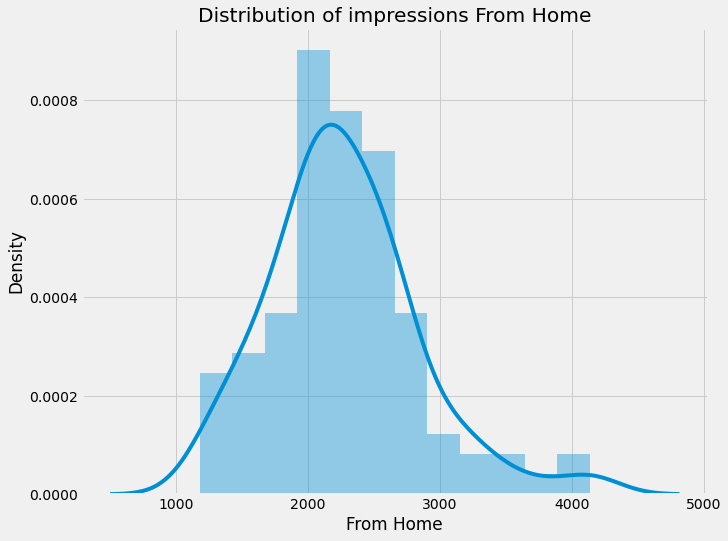

In [15]:
plt.figure(figsize= (10, 8))
plt.style.use("fivethirtyeight")
plt.title("Distribution of impressions From Home")
sn.distplot(df1["From Home"])
plt.show()


distribution receuved from hashtags

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


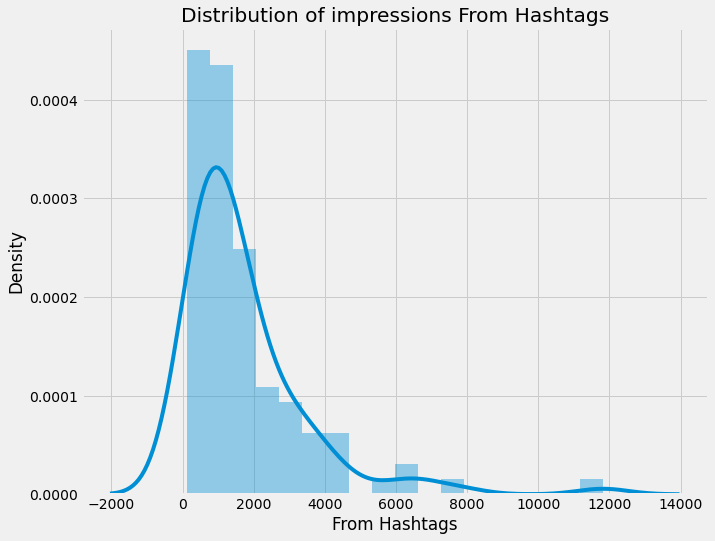

In [17]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of impressions From Hashtags")
sn.distplot(df1["From Hashtags"])
plt.show()

distribution of impressions received from the explore section of Instagram

c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


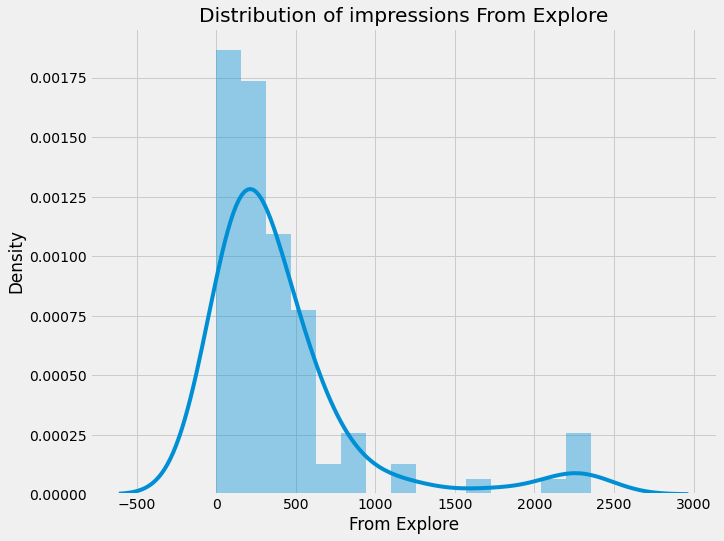

In [18]:
plt.figure(figsize= (10, 8))
plt.title("Distribution of impressions From Explore")
sn.distplot(df1["From Explore"])
plt.show()

In [22]:
import plotly.express as px

# for plotting a pie chart/doughnut

having a look at percentage of impressions from various instagram sources

In [21]:
home = df1['From Home'].sum()
hashtags = df1['From Hashtags'].sum()
explore = df1['From Explore'].sum()
other = df1['From Other'].sum()

label = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]


fig = px.pie(df1, values= values, names= label, title= 'Impression on INstagram Posts From Various Sources', hole= 0.5)

fig.show()

almost 50 per cent of the reach is from followers, 38.1 per cent is from hashtags, 9.14 per cent is from the explore section, and 3.01 per cent is from other sources.

trying to understand kind of content posted on instagrm

create a word cloud of the hashtags columns

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

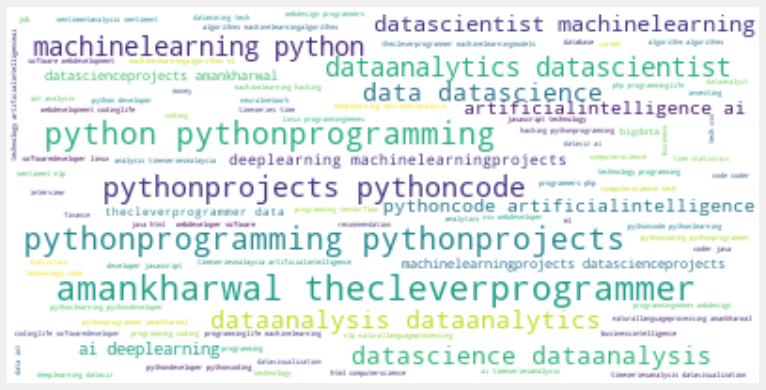

In [25]:
text = " ".join(i for i in df1.Hashtags)
sw = set(STOPWORDS)
wc = WordCloud(stopwords= sw, background_color= "white").generate(text)
plt.figure(figsize= (12,10))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

create a word cloud of the caption columns

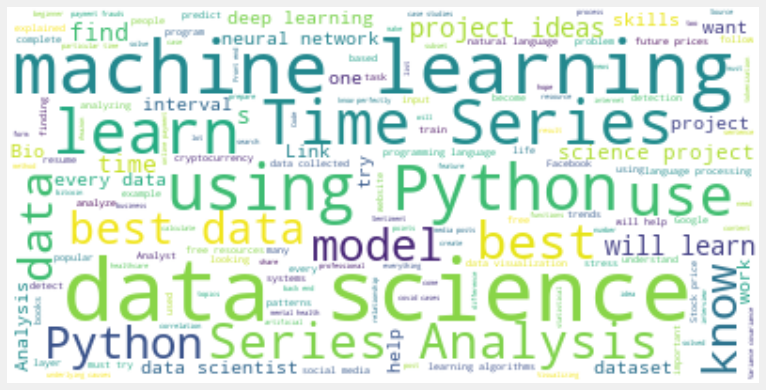

In [26]:
text = " ".join(i for i in df1.Caption)
sw = set(STOPWORDS)
wc = WordCloud(stopwords= sw, background_color= "white").generate(text)
plt.figure(figsize= (12,10))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

 relationship between the number of likes and the number of impressions

In [30]:
import numpy as np

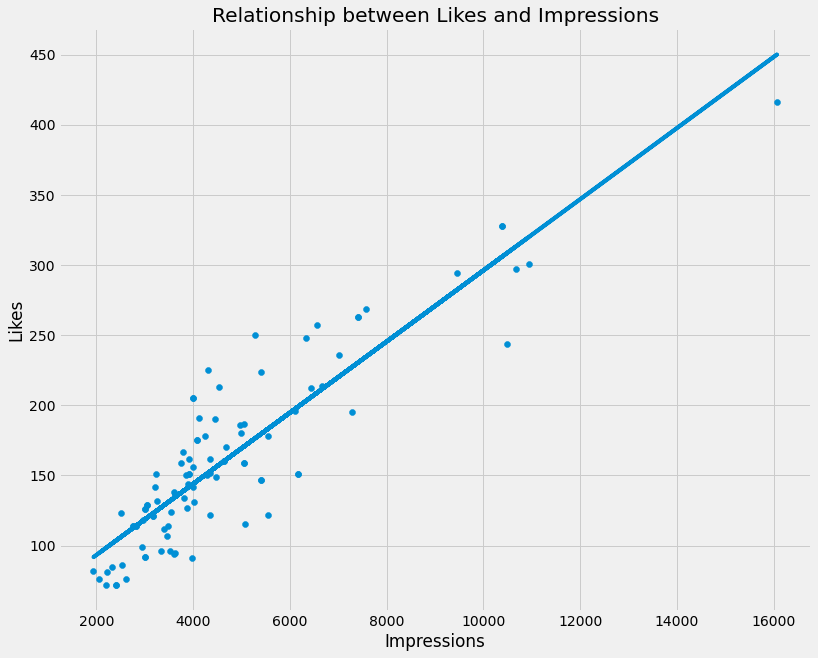

In [31]:
# use a scatter plot using matplotlib
plt.figure(figsize= (12,10))
plt.xlabel("Impressions")
plt.ylabel("Likes")
plt.title("Relationship between Likes and Impressions")
plt.scatter(df1.Impressions, df1.Likes)
# add trendline
z = np.polyfit(df1.Impressions, df1.Likes, 1)
p = np.poly1d(z)
plt.plot(df1.Impressions, p(df1.Impressions))
plt.show()

In [35]:
# using plotly
fig = px.scatter(data_frame = df1, x= "Impressions", y= "Likes", trendline= "ols", title= "Relationship between Likes and Impressions")
fig.show()